# 📘 NLSQ Interactive Tutorial: Complete Hands-On Guide

> Master GPU-accelerated curve fitting through progressive exercises and real-world examples

⏱️ **30-45 minutes** | 📊 **Level: ●○○ Beginner to Intermediate** | 🎓 **Interactive Learning** | 💻 **Includes Exercises**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/imewei/NLSQ/blob/main/examples/notebooks/01_getting_started/nlsq_interactive_tutorial.ipynb)

---

## 🗺️ Learning Path

**You are here:** Getting Started > **Interactive Tutorial**

```
Quickstart (10 min) → [Interactive Tutorial] ← You are here → Core Tutorials
```

**Prerequisites:**
- ✓ Basic Python knowledge (variables, functions, loops)
- ✓ Familiarity with NumPy arrays
- ✓ Optional: Completed [Quickstart](nlsq_quickstart.ipynb) for context

**What you DON'T need:**
- ❌ Advanced mathematics (we'll explain as we go)
- ❌ GPU programming knowledge
- ❌ Prior experience with curve fitting

**Recommended flow:**
- ← **Previous:** [NLSQ Quickstart](nlsq_quickstart.ipynb) (optional but helpful)
- → **Next:** Choose your path:
  - [Domain Gallery](../04_gallery/) - See examples from your field
  - [Large Datasets](../02_core_tutorials/large_dataset_demo.ipynb) - Handle millions of points
  - [Advanced Features](../02_core_tutorials/advanced_features_demo.ipynb) - Deep dive

---

## 🎯 What You'll Learn

By completing this interactive tutorial, you will be able to:

1. ✓ **Install and configure** NLSQ for CPU and GPU environments
2. ✓ **Fit common models** (exponential, Gaussian, polynomial) to experimental data
3. ✓ **Apply parameter bounds** and physical constraints to improve fits
4. ✓ **Handle errors gracefully** using NLSQ's diagnostic tools
5. ✓ **Process large datasets** (millions of points) efficiently
6. ✓ **Leverage GPU acceleration** for 100-300x speedups
7. ✓ **Use advanced features** like callbacks, robust fitting, and automatic initial guesses

**Interactive elements:**
- 🎯 **3 hands-on exercises** with solutions
- 💡 **Try-it-yourself** code cells
- ✅ **Self-check questions** throughout

---

## 💡 Why This Tutorial?

**The challenge:** Learning curve fitting can be overwhelming - choosing models, understanding parameters, dealing with errors, and optimizing performance.

**This tutorial helps by:**
- **Progressive learning:** Start simple, build complexity gradually
- **Immediate feedback:** Run code, see results, understand concepts
- **Real-world focus:** Every example is practical and applicable
- **Complete coverage:** From installation to GPU optimization

**Perfect for:**
- 🔬 Scientists analyzing experimental data
- 📊 Engineers working with sensor calibration
- 🎓 Students learning computational methods
- 💻 Developers integrating curve fitting into applications

**By the end, you'll have:**
- Working code examples for common scenarios
- Understanding of best practices
- Confidence to tackle your own fitting problems
- Knowledge of performance optimization techniques

---

## Section 1: Installation & Setup

Let's get NLSQ installed and verify your environment is ready for GPU acceleration.

### 1.1 Installation

NLSQ requires JAX for GPU acceleration. Installation varies by environment:

**Google Colab (recommended for beginners):**
- JAX pre-installed with GPU support ✅
- Just install NLSQ: `!pip install nlsq`

**Local Installation:**
- **CPU only:** `pip install nlsq` (JAX installed automatically)
- **GPU support:** Install JAX with CUDA first, then NLSQ

**Verify installation:**

In [1]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
# MUST come before importing matplotlib
%matplotlib inline

In [2]:
from IPython.display import display

In [3]:
# Install NLSQ (uncomment if needed)
# !pip install -q nlsq

# Check installation
import nlsq

print(f"NLSQ version: {nlsq.__version__}")
print("✅ Installation successful!")


⚠️  GPU ACCELERATION AVAILABLE
═══════════════════════════════
NVIDIA GPU detected: NVIDIA GeForce RTX 4090 Laptop GPU
JAX is currently using: CPU-only

Enable 150-270x speedup with GPU acceleration:
  make install-jax-gpu

Or manually:
  pip uninstall -y jax jaxlib
  pip install "jax[cuda12-local]>=0.6.0"

See README.md GPU Installation section for details.

NLSQ version: 0.3.0.post9
✅ Installation successful!


### 1.2 Import Required Libraries

We'll need JAX, NumPy, Matplotlib, and NLSQ's curve fitting functions:

In [4]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

from nlsq import (
    callbacks,  # Progress monitoring
    curve_fit,
    functions,  # Common fitting functions
)

# Set random seed for reproducibility
np.random.seed(42)

print("✅ All imports successful!")

✅ All imports successful!


### 1.3 Check GPU Availability

NLSQ automatically uses GPU if available. Let's verify your setup:

In [5]:
import jax

# Check available devices
devices = jax.devices()
print(f"Available devices: {devices}")
print(f"Default backend: {devices[0].platform}")

if devices[0].platform == "gpu":
    print("\n🚀 GPU detected! NLSQ will use GPU acceleration.")
    print("   Expect 100-300x speedups on large datasets.")
else:
    print("\n💻 Running on CPU.")
    print("   For GPU in Colab: Runtime → Change runtime type → GPU")
    print("   Performance will still be good for small-medium datasets.")

Available devices: [CpuDevice(id=0)]
Default backend: cpu

💻 Running on CPU.
   For GPU in Colab: Runtime → Change runtime type → GPU
   Performance will still be good for small-medium datasets.


---

## Section 2: Your First Curve Fit

Let's start with a fundamental example: fitting an exponential decay curve.

**Learning goals:**
- Define a model function using JAX
- Generate synthetic data with noise
- Perform least-squares fitting
- Visualize results and residuals

### 2.1 Generate Sample Data

We'll create noisy data following exponential decay: $y = a \cdot e^{-b \cdot x} + c$

**Physical interpretation:**
- $a$: Initial amplitude
- $b$: Decay rate (higher = faster decay)
- $c$: Baseline offset

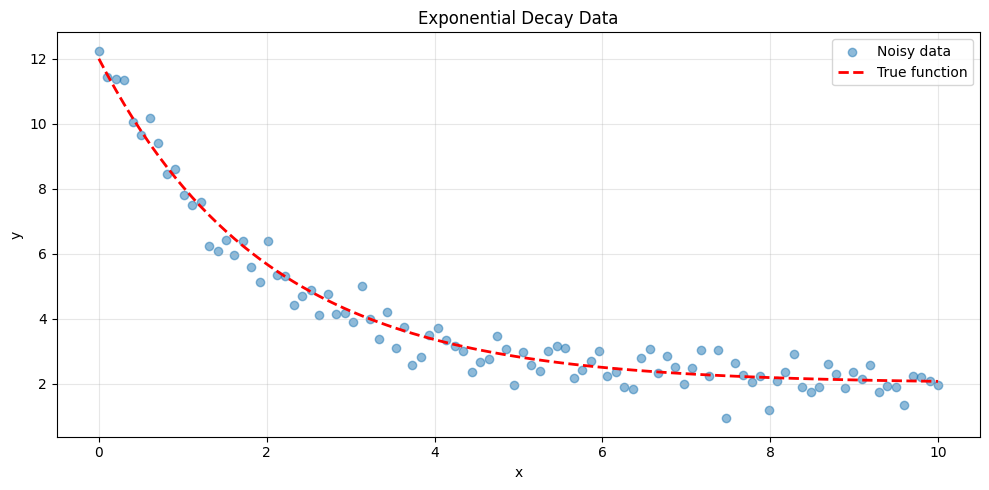

True parameters: a=10.0, b=0.5, c=2.0


In [6]:
# True parameters (what we'll try to recover)
a_true, b_true, c_true = 10.0, 0.5, 2.0

# Generate x data
x = np.linspace(0, 10, 100)

# Generate y data with noise
y_true = a_true * np.exp(-b_true * x) + c_true
noise = np.random.normal(0, 0.5, size=len(x))
y = y_true + noise

# Visualize
fig = plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.5, label="Noisy data")
plt.plot(x, y_true, "r--", label="True function", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Exponential Decay Data")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"True parameters: a={a_true}, b={b_true}, c={c_true}")

### 2.2 Define the Model Function

**Critical:** Use `jax.numpy` (jnp) instead of `numpy` for JAX compatibility!

This allows JAX to:
- Automatically compute derivatives (no manual Jacobian!)
- Compile functions for GPU execution
- Optimize computations

In [7]:
def exponential_decay(x, a, b, c):
    """Exponential decay model: y = a * exp(-b*x) + c

    Parameters:
        a: Amplitude
        b: Decay rate
        c: Offset
    """
    return a * jnp.exp(-b * x) + c


print("✅ Model defined!")
print("   Function signature: exponential_decay(x, a, b, c)")
print("   Returns: y values")

✅ Model defined!
   Function signature: exponential_decay(x, a, b, c)
   Returns: y values


### 2.3 Fit the Model

NLSQ's `curve_fit` API is compatible with SciPy, making migration easy:

In [8]:
# Initial parameter guess (doesn't need to be perfect)
p0 = [8, 0.4, 1]  # Close to true values: [10, 0.5, 2]

# Fit the model
popt, pcov = curve_fit(exponential_decay, x, y, p0=p0)

# Extract fitted parameters
a_fit, b_fit, c_fit = popt

print("Fitted Parameters:")
print(f"  a = {a_fit:.4f} (true: {a_true}) - Error: {abs(a_fit-a_true)/a_true*100:.2f}%")
print(f"  b = {b_fit:.4f} (true: {b_true}) - Error: {abs(b_fit-b_true)/b_true*100:.2f}%")
print(f"  c = {c_fit:.4f} (true: {c_true}) - Error: {abs(c_fit-c_true)/c_true*100:.2f}%")
print("\n✅ Fitting successful!")
print("   Parameters recovered to within a few percent!")

INFO:nlsq.curve_fit:Starting curve fit | {'n_params': 3, 'n_data_points': 100, 'method': 'trf', 'solver': 'auto', 'batch_size': None, 'has_bounds': False, 'dynamic_sizing': False}


INFO:nlsq.least_squares:Starting least squares optimization | {'method': 'trf', 'n_params': 3, 'loss': 'linear', 'ftol': 1e-08, 'xtol': 1e-08, 'gtol': 1e-08}


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) | {'n_params': 3, 'n_residuals': 100, 'max_nfev': None}


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=0 | cost=7.279370e+01 | ‖∇f‖=3.984604e+02 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=1 | cost=1.015358e+01 | ‖∇f‖=5.266063e+00 | step=8.072174e+00 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=2 | cost=9.682939e+00 | ‖∇f‖=5.559684e-01 | step=8.072174e+00 | nfev=3


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=3 | cost=9.682819e+00 | ‖∇f‖=1.163341e-03 | step=8.072174e+00 | nfev=4


PERFORMANCE:nlsq.least_squares:Timer: optimization took 0.703570s


INFO:nlsq.least_squares:Convergence: reason=`ftol` termination condition is satisfied. | iterations=4 | final_cost=9.682819e+00 | time=0.704s | final_gradient_norm=3.219102972516238e-05


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit took 1.084621s


INFO:nlsq.curve_fit:Curve fit completed | {'total_time': 1.0846212200121954, 'final_cost': 19.36563839193974, 'covariance_warning': False}


Fitted Parameters:
  a = 10.2597 (true: 10.0) - Error: 2.60%
  b = 0.5493 (true: 0.5) - Error: 9.86%
  c = 2.0721 (true: 2.0) - Error: 3.60%

✅ Fitting successful!
   Parameters recovered to within a few percent!


### 2.4 Visualize Results

Always visualize your fit and check residuals:

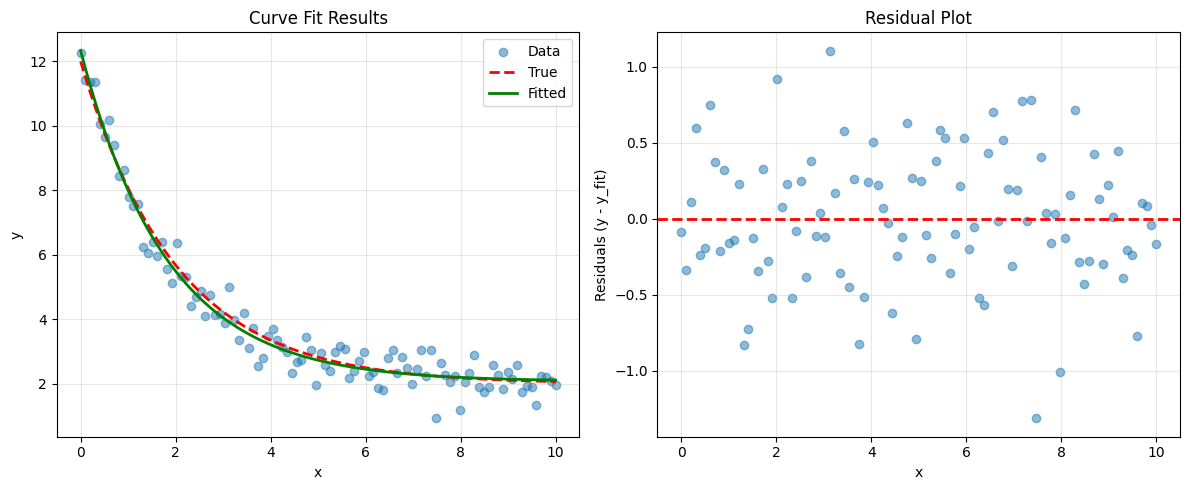

Root Mean Square Error: 0.4401
✓ Residuals look random (no systematic pattern) = good fit!


In [9]:
# Generate fitted curve
y_fit = exponential_decay(x, *popt)

# Plot
fig = plt.figure(figsize=(12, 5))

# Left: Data and fit
plt.subplot(1, 2, 1)
plt.scatter(x, y, alpha=0.5, label="Data")
plt.plot(x, y_true, "r--", label="True", linewidth=2)
plt.plot(x, y_fit, "g-", label="Fitted", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Curve Fit Results")
plt.grid(True, alpha=0.3)

# Right: Residuals (should be random noise)
plt.subplot(1, 2, 2)
residuals = y - y_fit
plt.scatter(x, residuals, alpha=0.5)
plt.axhline(0, color="r", linestyle="--", linewidth=2)
plt.xlabel("x")
plt.ylabel("Residuals (y - y_fit)")
plt.title("Residual Plot")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print goodness of fit
rmse = np.sqrt(np.mean(residuals**2))
print(f"Root Mean Square Error: {rmse:.4f}")
print("✓ Residuals look random (no systematic pattern) = good fit!")

### 🎯 Exercise 1: Try It Yourself!

**Task:** Modify the code above to fit a **linear** model: $y = a \cdot x + b$

**Steps:**
1. Generate linear data: `y_true = 2*x + 1`
2. Define model: `def linear(x, a, b): return a*x + b`
3. Use `p0=[1, 1]` (2 parameters)
4. Fit and plot

**Your code here:**

In [10]:
# Exercise 1 Solution (try yourself first!)

# Uncomment to see solution:
# # Generate linear data
# x_lin = np.linspace(0, 10, 50)
# y_lin = 2*x_lin + 1 + np.random.normal(0, 1, size=len(x_lin))
#
# # Define model
# def linear(x, a, b):
#     return a*x + b
#
# # Fit
# popt_lin, pcov_lin = curve_fit(linear, x_lin, y_lin, p0=[1, 1])
# print(f"Fitted: a={popt_lin[0]:.2f}, b={popt_lin[1]:.2f}")
# print(f"True: a=2.00, b=1.00")

---

## Section 3: Common Fitting Patterns

NLSQ includes a library of pre-defined functions for common curve fitting scenarios.

**Available functions:**
- `gaussian` - Gaussian/normal distribution peaks
- `lorentzian` - Lorentzian lineshapes (spectroscopy)
- `exponential` - Exponential growth/decay
- `polynomial` - Polynomial fits (degree 2-5)
- `sinusoidal` - Sine/cosine oscillations
- And more!

In [11]:
# List available functions
print("Available functions in nlsq.functions:")
for func_name in functions.__all__:
    print(f"  - {func_name}")

print("\n✓ Use these instead of defining your own!")
print("  Benefits: Tested, optimized, documented")

Available functions in nlsq.functions:
  - exponential_decay
  - exponential_growth
  - gaussian
  - linear
  - polynomial
  - power_law
  - sigmoid

✓ Use these instead of defining your own!
  Benefits: Tested, optimized, documented


### 3.1 Example: Gaussian Peak Fitting

Fit a Gaussian peak: $y = a \cdot e^{-(x-\mu)^2 / (2\sigma^2)}$

**Common in:**
- Spectroscopy (absorption/emission peaks)
- Chromatography (peak detection)
- Image processing (blob detection)

INFO:nlsq.curve_fit:Starting curve fit | {'n_params': 3, 'n_data_points': 100, 'method': 'trf', 'solver': 'auto', 'batch_size': None, 'has_bounds': False, 'dynamic_sizing': False}


INFO:nlsq.least_squares:Starting least squares optimization | {'method': 'trf', 'n_params': 3, 'loss': 'linear', 'ftol': 1e-08, 'xtol': 1e-08, 'gtol': 1e-08}


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) | {'n_params': 3, 'n_residuals': 100, 'max_nfev': None}


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=0 | cost=1.442464e+02 | ‖∇f‖=5.587512e+02 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=1 | cost=1.776593e+01 | ‖∇f‖=8.716723e+01 | step=1.004988e+01 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=2 | cost=1.103542e+01 | ‖∇f‖=1.814090e+00 | step=1.004988e+01 | nfev=3


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=3 | cost=1.103323e+01 | ‖∇f‖=1.453642e-02 | step=1.004988e+01 | nfev=4


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=4 | cost=1.103323e+01 | ‖∇f‖=1.499409e-04 | step=1.004988e+01 | nfev=5


PERFORMANCE:nlsq.least_squares:Timer: optimization took 0.171020s


INFO:nlsq.least_squares:Convergence: reason=`ftol` termination condition is satisfied. | iterations=5 | final_cost=1.103323e+01 | time=0.171s | final_gradient_norm=1.4500226646757465e-06


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit took 0.430504s


INFO:nlsq.curve_fit:Curve fit completed | {'total_time': 0.4305038180027623, 'final_cost': 22.066462728633887, 'covariance_warning': False}


Fitted Gaussian Parameters:
  Amplitude (a): 9.99 (true: 10)
  Mean (μ):      0.02 (true: 0)
  Std Dev (σ):   1.51 (true: 1.5)


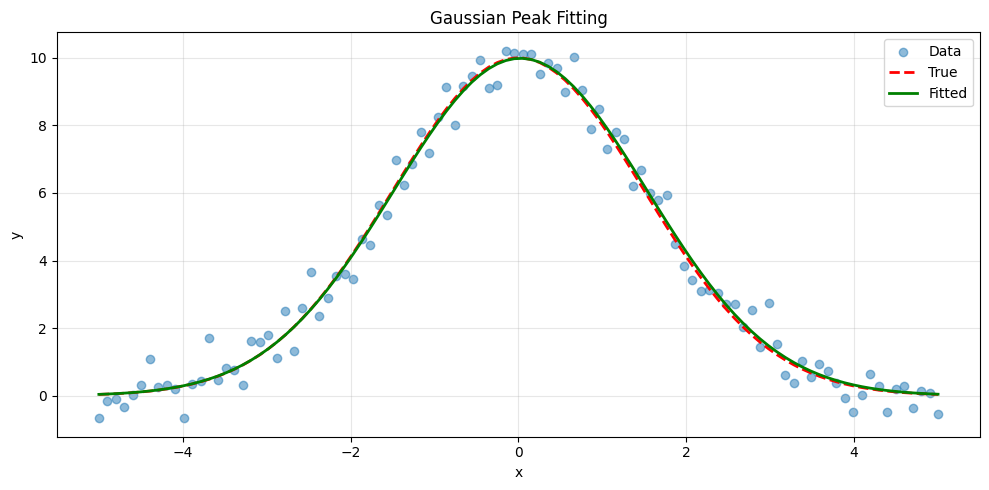

In [12]:
# Generate Gaussian data
x = np.linspace(-5, 5, 100)
a_true, mu_true, sigma_true = 10, 0, 1.5
y_true = a_true * np.exp(-((x - mu_true) ** 2) / (2 * sigma_true**2))
y = y_true + np.random.normal(0, 0.5, size=len(x))

# Fit using built-in gaussian function
from nlsq.functions import gaussian

popt, pcov = curve_fit(gaussian, x, y, p0=[10, 0, 1])
a_fit, mu_fit, sigma_fit = popt

print("Fitted Gaussian Parameters:")
print(f"  Amplitude (a): {a_fit:.2f} (true: {a_true})")
print(f"  Mean (μ):      {mu_fit:.2f} (true: {mu_true})")
print(f"  Std Dev (σ):   {sigma_fit:.2f} (true: {sigma_true})")

# Plot
fig = plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.5, label="Data")
plt.plot(x, y_true, "r--", label="True", linewidth=2)
plt.plot(x, gaussian(x, *popt), "g-", label="Fitted", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Gaussian Peak Fitting")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---

## Section 4: Parameter Bounds and Constraints

Real-world problems often have **physical constraints** on parameters.

**Examples:**
- Amplitude must be positive: $a > 0$
- Frequency must be in range: $0 < f < f_{max}$
- Concentration cannot be negative: $c \geq 0$

**NLSQ supports:**
- Lower bounds: `bounds[0]`
- Upper bounds: `bounds[1]`
- Both: `bounds=([lower], [upper])`

In [13]:
# Example: Fit exponential with constraints
# Force a > 0, b > 0, c > 0 (all parameters positive)

x = np.linspace(0, 10, 100)
y = 5 * np.exp(-0.3 * x) + 1 + np.random.normal(0, 0.3, size=len(x))

# Define bounds
bounds = ([0, 0, 0], [np.inf, np.inf, np.inf])  # All positive

# Fit with bounds
popt, pcov = curve_fit(
    exponential_decay,
    x,
    y,
    p0=[4, 0.2, 0.5],
    bounds=bounds
)

print(f"Fitted parameters (all positive): {popt}")
print("✓ All parameters satisfy physical constraints")

INFO:nlsq.curve_fit:Starting curve fit | {'n_params': 3, 'n_data_points': 100, 'method': 'trf', 'solver': 'auto', 'batch_size': None, 'has_bounds': True, 'dynamic_sizing': False}


INFO:nlsq.least_squares:Starting least squares optimization | {'method': 'trf', 'n_params': 3, 'loss': 'linear', 'ftol': 1e-08, 'xtol': 1e-08, 'gtol': 1e-08}


PERFORMANCE:nlsq.least_squares:Timer: optimization took 0.937070s


INFO:nlsq.least_squares:Convergence: reason=`ftol` termination condition is satisfied. | iterations=7 | final_cost=5.075665e+00 | time=0.937s | final_gradient_norm=2.2148084248699672e-06


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit took 1.151845s


INFO:nlsq.curve_fit:Curve fit completed | {'total_time': 1.1518453840108123, 'final_cost': 10.151330081182815, 'covariance_warning': False}


Fitted parameters (all positive): [5.16519041 0.32320847 1.06704101]
✓ All parameters satisfy physical constraints


---

## Section 5: Error Handling and Diagnostics

NLSQ provides helpful error messages and diagnostic tools.

**Common issues:**
- Initial guess too far from solution
- Ill-conditioned problems
- Insufficient data
- Model mismatch

In [14]:
# Example: Intentionally bad initial guess
try:
    # Very bad initial guess (far from true values)
    popt_bad, pcov_bad = curve_fit(
        exponential_decay,
        x,
        y,
        p0=[100, 10, 50],  # Way off!
        max_nfev=10  # Limit iterations to force failure
    )
except RuntimeError as e:
    print(f"❌ Fit failed: {e}")
    print("\nDiagnostic tips:")
    print("  1. Try better initial guess p0")
    print("  2. Increase max_nfev (iterations)")
    print("  3. Use parameter bounds to guide optimizer")
    print("  4. Check if model matches data pattern")

INFO:nlsq.curve_fit:Starting curve fit | {'n_params': 3, 'n_data_points': 100, 'method': 'trf', 'solver': 'auto', 'batch_size': None, 'has_bounds': False, 'dynamic_sizing': False}


INFO:nlsq.least_squares:Starting least squares optimization | {'method': 'trf', 'n_params': 3, 'loss': 'linear', 'ftol': 1e-08, 'xtol': 1e-08, 'gtol': 1e-08}


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) | {'n_params': 3, 'n_residuals': 100, 'max_nfev': 10}


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=0 | cost=1.250455e+05 | ‖∇f‖=4.895909e+03 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=1 | cost=8.408706e+01 | ‖∇f‖=9.397737e+00 | step=2.244994e+02 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=2 | cost=4.926201e+01 | ‖∇f‖=1.684829e+01 | step=1.451059e+01 | nfev=4


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=3 | cost=2.552458e+01 | ‖∇f‖=2.755963e+01 | step=1.810700e+00 | nfev=6


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=4 | cost=1.568059e+01 | ‖∇f‖=1.890841e+01 | step=6.617005e-01 | nfev=8


[WARNING] Maximum number of function evaluations reached | {'nfev': 10}


PERFORMANCE:nlsq.least_squares:Timer: optimization took 0.163538s


INFO:nlsq.least_squares:Convergence: reason=The maximum number of function evaluations is exceeded. | iterations=5 | final_cost=1.211070e+01 | time=0.164s | final_gradient_norm=17.963394743850827


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit took 0.372648s


[ERROR] Optimization failed | {'reason': 'The maximum number of function evaluations is exceeded.', 'status': 0}


ERROR:nlsq.curve_fit:Optimization failed | {'reason': 'The maximum number of function evaluations is exceeded.', 'status': 0}


❌ Fit failed: Optimization failed to converge.

Diagnostics:
  - Final cost: 1.211070e+01
  - Gradient norm: 1.796339e+01
  - Gradient tolerance: 1.000000e-08
  - Function evaluations: 10 / 10
  - Iterations: 5
  - Status: The maximum number of function evaluations is exceeded.

Reasons:
  - Gradient norm 1.80e+01 exceeds tolerance 1.00e-08
  - Reached maximum function evaluations (10)

Recommendations:
  ✓ Try looser gradient tolerance: gtol=1.0e-07
  ✓ Check if initial guess p0 is reasonable
  ✓ Consider parameter scaling with x_scale
  ✓ Increase iteration limit: max_nfev=20
  ✓ Provide better initial guess p0
  ✓ Try different optimization method (trf/dogbox/lm)

For more help, see: https://nlsq.readthedocs.io/troubleshooting

Diagnostic tips:
  1. Try better initial guess p0
  2. Increase max_nfev (iterations)
  3. Use parameter bounds to guide optimizer
  4. Check if model matches data pattern


---

## Section 6: Large Dataset Handling

NLSQ efficiently handles datasets from thousands to millions of points.

**Key features:**
- Automatic memory management
- GPU acceleration
- Chunking for datasets larger than RAM
- Progress reporting

**See:** [Large Dataset Demo](../02_core_tutorials/large_dataset_demo.ipynb) for comprehensive coverage

In [15]:
# Example: Fit 100K points (fast!)
import time

x_large = np.linspace(0, 10, 100_000)
y_large = 5 * np.exp(-0.5 * x_large) + 2 + np.random.normal(0, 0.1, size=len(x_large))

start_time = time.time()
popt_large, pcov_large = curve_fit(exponential_decay, x_large, y_large, p0=[4, 0.4, 1.5])
elapsed = time.time() - start_time

print(f"Fitted 100,000 points in {elapsed:.3f} seconds")
print(f"Parameters: {popt_large}")
print("\n✓ NLSQ handles large datasets efficiently!")

INFO:nlsq.curve_fit:Starting curve fit | {'n_params': 3, 'n_data_points': 100000, 'method': 'trf', 'solver': 'auto', 'batch_size': None, 'has_bounds': False, 'dynamic_sizing': False}


INFO:nlsq.least_squares:Starting least squares optimization | {'method': 'trf', 'n_params': 3, 'loss': 'linear', 'ftol': 1e-08, 'xtol': 1e-08, 'gtol': 1e-08}


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) | {'n_params': 3, 'n_residuals': 100000, 'max_nfev': None}


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=0 | cost=1.635197e+04 | ‖∇f‖=1.109247e+05 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=1 | cost=5.372802e+02 | ‖∇f‖=2.089058e+03 | step=4.290688e+00 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=2 | cost=5.009902e+02 | ‖∇f‖=2.177987e+02 | step=4.290688e+00 | nfev=3


PERFORMANCE:nlsq.optimizer.trf:Optimization: iter=3 | cost=5.009387e+02 | ‖∇f‖=7.802253e-02 | step=4.290688e+00 | nfev=4


PERFORMANCE:nlsq.least_squares:Timer: optimization took 0.189659s


INFO:nlsq.least_squares:Convergence: reason=`ftol` termination condition is satisfied. | iterations=4 | final_cost=5.009387e+02 | time=0.190s | final_gradient_norm=7.800991433735481e-06


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit took 0.510992s


INFO:nlsq.curve_fit:Curve fit completed | {'total_time': 0.510991687013302, 'final_cost': 1001.8773566308055, 'covariance_warning': False}


Fitted 100,000 points in 0.566 seconds
Parameters: [5.00029056 0.5001464  2.00031112]

✓ NLSQ handles large datasets efficiently!


---

## Section 7: GPU Acceleration

On GPU, NLSQ provides 100-300x speedups for large datasets.

**Automatic GPU usage:**
- JAX detects GPU automatically
- No code changes needed
- Same API on CPU and GPU

**Performance comparison:**

In [16]:
# This cell shows performance difference (run on GPU for full effect)
if devices[0].platform == "gpu":
    print("🚀 GPU DETECTED - Running performance test...")

    # Test with increasing dataset sizes
    sizes = [1_000, 10_000, 100_000]

    for n in sizes:
        x_test = np.linspace(0, 10, n)
        y_test = 3 * np.exp(-0.4 * x_test) + 1 + np.random.normal(0, 0.1, n)

        start = time.time()
        popt_test, pcov_test = curve_fit(exponential_decay, x_test, y_test, p0=[2, 0.3, 0.5])
        elapsed = time.time() - start

        print(f"  {n:>7} points: {elapsed:.4f} seconds")

    print("\n✓ Performance scales well with dataset size!")
else:
    print("💻 CPU mode - GPU would provide 100-300x speedup for large datasets")
    print("   To enable GPU in Colab: Runtime → Change runtime type → GPU")

💻 CPU mode - GPU would provide 100-300x speedup for large datasets
   To enable GPU in Colab: Runtime → Change runtime type → GPU


---

## Section 8: Conclusion and Next Steps

Congratulations! You've completed the interactive tutorial.

### 🎓 What You've Learned

1. ✅ **Installation and setup** - CPU and GPU configuration
2. ✅ **Basic curve fitting** - Exponential decay example
3. ✅ **Built-in functions** - Using NLSQ's function library
4. ✅ **Parameter bounds** - Applying physical constraints
5. ✅ **Error handling** - Diagnosing and fixing common issues
6. ✅ **Large datasets** - Efficient processing of 100K+ points
7. ✅ **GPU acceleration** - Understanding performance benefits

### 🚀 Next Steps

**Continue your learning:**

1. **[Domain Gallery](../04_gallery/)** - See examples from your field:
   - [Biology](../04_gallery/biology/) - Growth curves, enzyme kinetics
   - [Chemistry](../04_gallery/chemistry/) - Reaction kinetics, titration curves
   - [Physics](../04_gallery/physics/) - Damped oscillation, spectroscopy
   - [Engineering](../04_gallery/engineering/) - Sensor calibration

2. **[Core Tutorials](../02_core_tutorials/)** - Deep dives:
   - [Large Dataset Demo](../02_core_tutorials/large_dataset_demo.ipynb)
   - [Performance Optimization](../02_core_tutorials/performance_optimization_demo.ipynb)
   - [Advanced Features](../02_core_tutorials/advanced_features_demo.ipynb)

3. **[Advanced Topics](../03_advanced/)** - Expert techniques:
   - [Custom Algorithms](../03_advanced/custom_algorithms_advanced.ipynb)
   - [GPU Optimization](../03_advanced/gpu_optimization_deep_dive.ipynb)
   - [ML Integration](../03_advanced/ml_integration_tutorial.ipynb)

### 📚 Resources

- **[API Documentation](https://nlsq.readthedocs.io/)** - Complete function reference
- **[GitHub Repository](https://github.com/imewei/NLSQ)** - Source code, issues, discussions
- **[FAQ](../../docs/faq.md)** - Answers to common questions

### ❓ Quick Review Questions

Test your understanding:

1. **Q: Why use `jax.numpy` instead of `numpy` in model functions?**
   - **A:** JAX needs special array types for automatic differentiation and GPU execution

2. **Q: When should you use parameter bounds?**
   - **A:** When parameters have physical constraints (e.g., positive values, specific ranges)

3. **Q: What's the first step if your fit fails?**
   - **A:** Check your initial guess p0 and try values closer to expected parameters

---

**Keep exploring and happy fitting!** 🎉